### Project description




You've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.

You have:

Server logs with data on Yandex.Afisha visits from June 2017 through May 2018

Dump file with all orders for the period
Marketing expenses statistics

You are going to study:
How people use the product
When they start to buy
How much money each customer brings
When they pay off

### Step 1. Download the data and prepare it for analysis

Import libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

Import files

In [2]:
visits_raw = pd.read_csv('C:/Users/anna/Desktop/Y-data/Project6 BA/visits_log_us.csv')
orders_raw = pd.read_csv('C:/Users/anna/Desktop/Y-data/Project6 BA/orders_log_us.csv')
costs_raw = pd.read_csv('C:/Users/anna/Desktop/Y-data/Project6 BA/costs_us.csv')

Optimize the data for analysis. Make sure each column contains the correct data type.

In [3]:
print(len(visits_raw))
visits_raw.head(2)

359400


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


Next step I'll get rid of the object type when possible. Objects in pandas use a lot of memory.

In [4]:
visits_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [5]:
visits_raw['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [6]:
visits = pd.read_csv('C:/Users/anna/Desktop/Y-data/Project6 BA/visits_log_us.csv',                   
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts']) 

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [8]:
print(len(orders_raw))
orders_raw.head(2)

50415


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447


In [9]:
orders_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [10]:
orders = pd.read_csv('C:/Users/anna/Desktop/Y-data/Project6 BA/orders_log_us.csv',                   
                  parse_dates=['Buy Ts']) 

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
print(len(costs_raw))
costs_raw.head(2)

2542


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25


In [13]:
costs_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [14]:
costs = pd.read_csv('C:/Users/anna/Desktop/Y-data/Project6 BA/costs_us.csv',                   
                  parse_dates=['dt']) 

In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [16]:
orders.rename(columns={'Buy Ts':'buy_ts',
                          'Revenue':'revenue',
                          'Uid':'uid'}, 
                 inplace=True)

In [17]:
visits.rename(columns={'Device':'device',
                          'End Ts':'end_ts',
                          'Source Id': 'source_id',
                          'Start Ts':'start_ts',
                          'Uid':'uid'}, 
                 inplace=True)

Conclusuion: I optimized memory usage by converting object data type to category and timefarme types. I also renamed the columns, brining all column name to one format.

### Step 2. Make reports and calculate metrics

>Product
- How many people use it every day, week, and month?
- How many sessions are there per day? (One user might have more than one session.)
- What is the length of each session?
- How often do users come back?

**How many people use it every day, week, and month?**

Creating separate columns for year, month, and week values

In [18]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

Splitting data on devices types to see differences

In [19]:
visits_touch = visits.loc[visits.device == 'touch']
visits_desktop = visits.loc[visits.device == 'desktop']

Calculating vanity metrics by groupping the data by session date/week and finding the means

In [20]:
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()

In [21]:
print('Users per day:', int(dau_total))
print('Users per week:', int(wau_total))
print('Users per month:', int(mau_total))

Users per day: 907
Users per week: 5716
Users per month: 23228


Calculating vanity metrics by devices types

In [22]:
mau_total_t = visits_touch.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
dau_total_t = visits_touch.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total_t = visits_touch.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()

In [23]:
mau_total_d = visits_desktop.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
dau_total_d = visits_desktop.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total_d = visits_desktop.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()

In [24]:
print('Touch Users per day:', int(dau_total_t))
print('Touch Users per week:', int(wau_total_t))
print('Touch Users per month:', int(mau_total_t))

Touch Users per day: 252
Touch Users per week: 1634
Touch Users per month: 6825


In [25]:
print('Desktop Users per day:', int(dau_total_d))
print('Desktop Users per week:', int(wau_total_d))
print('Desktop Users per month:', int(mau_total_d))

Desktop Users per day: 659
Desktop Users per week: 4129
Desktop Users per month: 16724


Conclusion: users prefer to use the product via desktop on 40% per month more than via touch. 

**How many sessions are there per day? (One user might have more than one session)**

In [26]:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [27]:
avg_sessions_per_user = sessions_per_user.mean()
avg_sessions_per_user

n_sessions           987.362637
n_users              907.991758
sessions_per_user      1.082170
dtype: float64

Conclusion: there is in average 1 session per user.

**What is the length of each session?**

In [28]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head(2)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680


0    60
dtype: int64

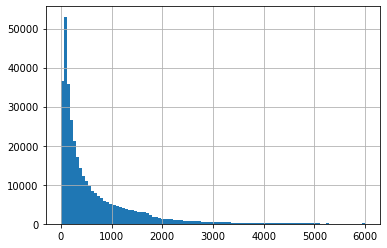

In [29]:
visits['session_duration_sec'].hist(bins=100, range=(0,6000))
asl = visits['session_duration_sec'].mode()
asl

Session duration 60 sec - value that appears most frequently in a data set.

**How often do users come back?**

Let's define the event and the period and form cohorts accordingly.

We'll take the date the user was first active in the app.

In [30]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680


Create column with date of first visit and join it to visits df

In [31]:
first_visit_datetime = visits.groupby('uid')['start_ts'].min()
first_visit_datetime.name = 'first_visit_date'
visits = visits.join(first_visit_datetime ,on='uid')
visits.head(2)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00


Form cohorts by month of purchase

In [32]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

Create a pivot table to find how many people continue making purchases in the months following the month of the first purchase

In [33]:
absolute_values = visits.pivot_table(index='first_visit_month', columns='visit_month', values='uid', aggfunc='nunique')
absolute_values

visit_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


Find the cohort's lifetime

In [34]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']

Convert timedelta64 to the number of months between the two dates

In [35]:
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')

Round the cohort_lifetime column values, then convert them to integers 

In [36]:
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Group the data by cohort and lifetime and find the number of active users at a certain lifetime month for each cohort

In [37]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Find the initial number of users in the cohort by looking at the 0th month

In [38]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]

Rename the user_id column

In [39]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

Join the data on cohorts with the initial number of users in the cohort

In [40]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')

Calculate the retention rate. Divide the number of active users in each week by the initial number of users in the cohort

In [41]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum').round(2)
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.08,0.05,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.04,0.04
2017-07-01,1.0,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.04,0.03,0.03,NaN
2017-08-01,1.0,0.08,0.06,0.06,0.05,0.04,0.04,0.04,0.03,0.03,NaN,NaN
2017-09-01,1.0,0.09,0.07,0.05,0.04,0.04,0.04,0.02,0.02,NaN,NaN,NaN
2017-10-01,1.0,0.08,0.05,0.04,0.03,0.03,0.02,0.02,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.08,0.04,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.06,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.06,0.04,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.06,0.03,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Make heat map for retention rate pivot

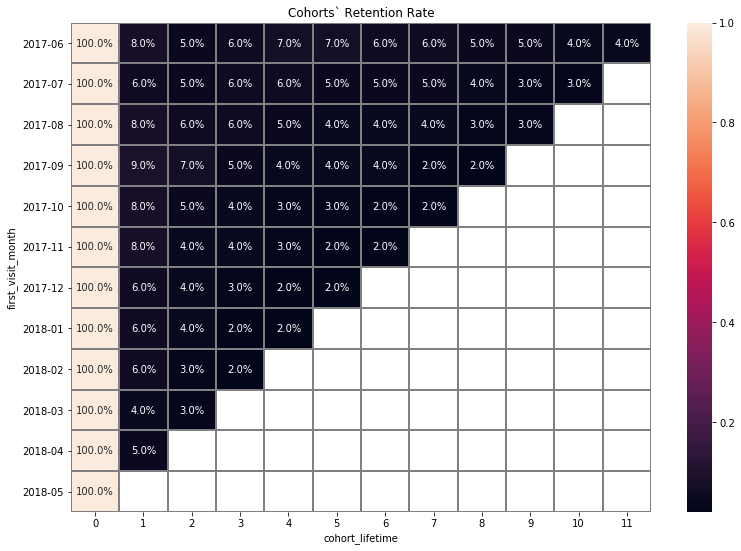

In [42]:
#Set the figure size
plt.figure(figsize=(13, 9))
# Set the visualization title
plt.title('Cohorts` Retention Rate')
# Make a heatmap
sns.heatmap(retention_pivot, annot=True, 
            fmt='.1%', linewidths=1, 
            linecolor='gray').set_yticklabels(retention_pivot.index.strftime('%Y-%m'));

Conclusion: after 2017-12 retention rate after 2nd month started to decrease. 9-8% previously comparing to 4-6% after 2017-12.

**2.Sales**

**When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)?**

In [43]:
orders.head(2)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447


For each user, find date of first order

In [44]:
first_order_dates = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order_dates.columns= ['uid','first_order_date']
first_order_dates

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [45]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0


For each user, find date of first session

In [46]:
first_session_dates = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_session_dates.columns= ['uid','first_session_date']
first_session_dates

,uid,first_session_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


Merge tables on user_id

In [47]:
turnover = pd.merge(first_session_dates, first_order_dates, on='uid')
turnover

,uid,first_session_date,first_order_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00


Calculate time between first session and first order

In [48]:
turnover['turnover_time'] = turnover['first_order_date'] - turnover['first_session_date']

Creating slice with unique users

In [49]:
users_conversion = turnover[['uid', 'turnover_time']].drop_duplicates(subset = ['uid'])
users_conversion

,uid,turnover_time
0,313578113262317,106 days 23:02:00
1,1575281904278712,0 days 00:00:00
2,2429014661409475,0 days 01:19:00
3,2464366381792757,0 days 19:44:00
4,2551852515556206,0 days 00:00:00
...,...,...
36518,18445147675727495770,95 days 19:33:00
36519,18445407535914413204,0 days 00:07:00
36520,18445601152732270159,231 days 11:03:00
36521,18446156210226471712,103 days 09:33:00


Calculating days to convertion

In [50]:
users_conversion['days_to_conversion'] = users_conversion['turnover_time'] / np.timedelta64(1,'D')
users_conversion['days_to_conversion'] = users_conversion['days_to_conversion'].round().astype('int')

Calculating minutes to convertion

In [51]:
users_conversion['mins_to_conversion'] = users_conversion['turnover_time'] / np.timedelta64(1,'m')
users_conversion['mins_to_conversion'] = users_conversion['mins_to_conversion'].round().astype('int')

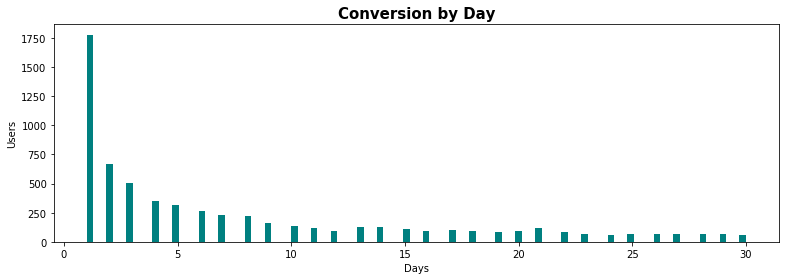

In [52]:
plt.figure(figsize=(13,4))
plt.hist(users_conversion['days_to_conversion'], bins=100, range=(1, 30), color='teal')
plt.title('Conversion by Day', fontsize=15,fontweight="bold")
plt.xlabel('Days')
plt.ylabel('Users')
plt.show()

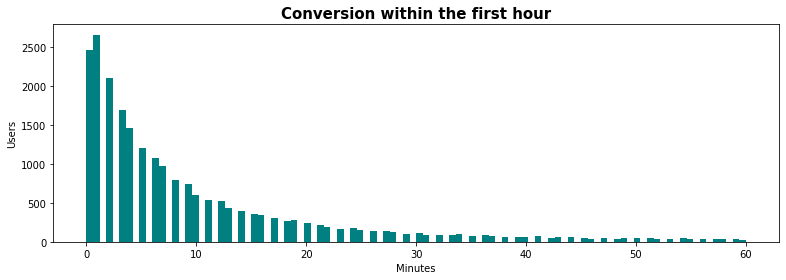

In [53]:
plt.figure(figsize=(13,4))
plt.hist(users_conversion['mins_to_conversion'], bins=100, range=(0, 60), color='teal')
plt.title('Conversion within the first hour', fontsize=15,fontweight="bold")
plt.xlabel('Minutes')
plt.ylabel('Users')
plt.show()

In [54]:
conversion_by_day = users_conversion['days_to_conversion'].value_counts().reset_index() 
conversion_by_day

,index,days_to_conversion
0,0,25217
1,1,1779
2,2,671
3,3,504
4,4,351
...,...,...
343,353,1
344,345,1
345,313,1
346,262,1


Conclusion: most of the users convert on the first day.

**How many orders do they make during a given period of time?**

In [55]:
orders.head(2)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447


In [56]:
orders['orders_year'] = orders['buy_ts'].dt.year
orders['orders_month'] = orders['buy_ts'].dt.month

In [57]:
orders_per_user = orders.groupby(['orders_year','orders_month']).agg({'uid':['count', 'nunique']}).reset_index()
orders_per_user.columns = ['orders_year','orders_month','n_orders', 'n_users']
orders_per_user['orders_per_user'] = orders_per_user['n_orders'] / orders_per_user['n_users']
orders_per_user.head(5)

,orders_year,orders_month,n_orders,n_users,orders_per_user
0,2017,6,2354,2023,1.163618
1,2017,7,2363,1984,1.191028
2,2017,8,1807,1472,1.227582
3,2017,9,3387,2750,1.231636
4,2017,10,5679,4675,1.214759


**What is the average purchase size?**

In [58]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [59]:
first_order_day = orders.groupby('uid')['buy_ts'].min()
first_order_day.name = 'first_order_day'

In [60]:
orders = orders.join(first_order_day, on='uid')

In [61]:
orders['first_order_month'] = orders['first_order_day'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [62]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()

In [63]:
orders_grouped_by_cohorts.columns = ['first_order_month','order_month','revenue', 'n_users']

In [64]:
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,n_users
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,61
2,2017-06-01,2017-08-01,885.34,50
3,2017-06-01,2017-09-01,1931.30,54
4,2017-06-01,2017-10-01,2068.58,88


In [65]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['n_users']
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue_per_user'].round()

In [66]:
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,n_users,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,5.0
1,2017-06-01,2017-07-01,981.82,61,16.0
2,2017-06-01,2017-08-01,885.34,50,18.0
3,2017-06-01,2017-09-01,1931.30,54,36.0
4,2017-06-01,2017-10-01,2068.58,88,24.0


In [67]:
print('Average puchase per user',orders_grouped_by_cohorts['revenue_per_user'].mean())

Average puchase per user 14.746835443037975


I'll plot a pivot table that shows dynamic in revenue per user

In [68]:
orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns='order_month', values='revenue_per_user', aggfunc='mean')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,5.0,16.0,18.0,36.0,24.0,22.0,31.0,25.0,19.0,27.0,26.0,10.0,NaN
2017-07-01,NaN,6.0,12.0,21.0,11.0,7.0,8.0,6.0,7.0,7.0,13.0,12.0,NaN
2017-08-01,NaN,NaN,5.0,11.0,12.0,12.0,17.0,12.0,10.0,13.0,21.0,8.0,NaN
2017-09-01,NaN,NaN,NaN,6.0,22.0,13.0,139.0,20.0,26.0,27.0,17.0,11.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.0,11.0,7.0,7.0,7.0,7.0,7.0,7.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,13.0,7.0,5.0,8.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8.0,39.0,48.0,27.0,24.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,12.0,11.0,5.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,5.0,7.0,NaN


**How much money do they bring? (LTV)**

Now the file containing marketing costs broken down by day

In [69]:
costs.head() 

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


We have the date and total amount (costs). Let's have a look at the distribution

In [70]:
costs['dt'].describe() 

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

It's helpful to find the LTV for different cohorts. Let's review what we need to do:

- Find the date of each customer's first purchase
- Calculate the number of new customers for each date (or range of dates — here, for each month)
- Add the month of the first order to the table of orders
- Group the table and calculate the revenue

In [71]:
orders.head(2)

,buy_ts,revenue,uid,orders_year,orders_month,first_order_day,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,2017-06-01 00:25:00,2017-06-01,2017-06-01


In [72]:
costs['month'] = costs['dt'].astype('datetime64[M]') 

Now let's retrieve the month of each customer's first purchase:

In [73]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head() 

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


We'll calculate the number of new customers (n_buyers) for each month:

In [74]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Let's build cohorts

In [75]:
orders.head()

,buy_ts,revenue,uid,orders_year,orders_month,first_order_day,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,2017-06-01 07:58:00,2017-06-01,2017-06-01


Now we'll group the table of orders by month of first purchase and month of purchase and sum up the revenue. We'll set the index to the default using the reset_index() method:

In [76]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


 Let's add data on how many users made their first purchases in each month to the cohorts table.

In [77]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Since LTV is calculated on the basis of gross profit rather than revenue, we need to find the gross profit by multiplying revenue by profitability.

In the theory we set up the margin rate, so it made sense to do the same in the project. In the lesson we had 0.5 margin rate, but I will use 0.4 as an average for online-business.

Also LTV is a relative parameter, and it's easier to study for "mature" cohorts, so let's make the columns show the cohort's age instead of the month of the order.

In [78]:
margin_rate = .4

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0
1,2017-06-01,2023,2017-07-01,981.82,392.728,1
2,2017-06-01,2023,2017-08-01,885.34,354.136,2
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4


Let's divide the cohort's gross profit for each month by the total number of users in each cohort. I'll visualize the cohorts as a pivot table to make things clear.

In [79]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round(2)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.89,0.19,0.18,0.38,0.41,0.29,0.38,0.23,0.22,0.24,0.23,0.1
2017-07-01,2.40,0.13,0.25,0.14,0.07,0.06,0.05,0.06,0.06,0.06,0.06,
2017-08-01,2.11,0.19,0.18,0.16,0.2,0.11,0.08,0.16,0.12,0.08,,
2017-09-01,2.26,0.45,0.21,1.59,0.16,0.26,0.28,0.1,0.07,,,
2017-10-01,2.00,0.21,0.08,0.06,0.06,0.05,0.03,0.05,,,,
2017-11-01,2.06,0.16,0.08,0.13,0.06,0.02,0.05,,,,,
2017-12-01,1.90,0.1,0.37,0.43,0.13,0.14,,,,,,
2018-01-01,1.65,0.12,0.12,0.06,0.03,,,,,,,
2018-02-01,1.66,0.11,0.03,0.03,,,,,,,,


Let's find the LTV of the first cohort by adding up the value for each month.

In [80]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

4.74

Customers from the first cohort brought $4.74 in revenue over their 12-month liftetime.

**3.Marketing
How much money was spent? Overall/per source/over time**

I'll group costs by dt or source and visualize it.

In [81]:
costs.head(2)

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01


In [82]:
spent = costs.groupby('dt').agg({'costs': 'sum'}).reset_index()
spent.columns = ['date', 'average_costs']
spent.head() 

,date,average_costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44


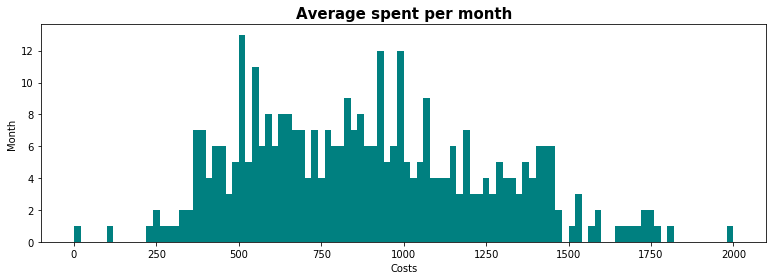

In [83]:
plt.figure(figsize=(13,4))
plt.hist(spent['average_costs'], bins=100, range=(0, 2000), color='teal')
plt.title('Average spent per month', fontsize=15,fontweight="bold")
plt.xlabel('Costs')
plt.ylabel('Month')
plt.show()

**How much did customer acquisition from each of the sources cost?**

Let's calculate CAC for this cohort. We'll divide the the costs for the cohort month by the number of people.

In [84]:
# getting the necessary cohort
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# calculating costs for the cohort month
costs_201706 = costs[costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = report[report['first_order_month'] == '2017-06-01']['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706) 

CAC = 8.905091448344043
LTV = 4.74


**How worthwhile where the investments? (ROI)**

Let's run calculations for the other cohorts and determine the number of months each cohort requires to cover marketing expenses. I'll calculate CAC for each cohort. First we'll find the total expenses for each month, then I'll divide them by the number of customers in each cohort.

In [85]:
# calculating the costs per month
monthly_costs = costs.groupby('month').sum()
monthly_costs.head() 

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


Let's add the data on costs to the report and calculate CAC.

In [86]:
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012


In [87]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,1020,18015.0,8.905091


Let's find ROMI (return on marketing investment) by dividing LTV by CAC.

In [88]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.21,0.23,0.25,0.30,0.34,0.38,0.42,0.44,0.47,0.50,0.52,0.53
2017-07-01,0.25,0.27,0.29,0.31,0.32,0.32,0.33,0.33,0.34,0.35,0.35,NaN
2017-08-01,0.20,0.21,0.23,0.24,0.26,0.27,0.28,0.30,0.31,0.31,NaN,NaN
2017-09-01,0.24,0.29,0.31,0.48,0.49,0.52,0.55,0.56,0.57,NaN,NaN,NaN
2017-10-01,0.24,0.26,0.27,0.28,0.29,0.29,0.30,0.30,NaN,NaN,NaN,NaN
2017-11-01,0.22,0.24,0.25,0.26,0.27,0.27,0.28,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.22,0.23,0.27,0.32,0.33,0.35,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.17,0.18,0.19,0.20,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.19,0.20,0.20,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conclusion: the CAC is bigger than CLV, which means that the marketing team spends more money on acquisition, than gets in total revenue.
The cost and acquisition strategy needs to be reshaped.

**Final conclusion:**

I’ve analyzed data from 2 tables: orders and visitors and I found that:
- Users prefer to use the Yandex.Afisha via Desktop more than via app.
Desktop Users per month: 16724 vs Touch Users per month: 6825. Which gives us of 40% more traffic coming from desktop. I would recommend marketing team to analyze what are the reasons of lower popularity of the app. Considering the fact that nowadays users spend more time in their phones. Perhaps, the app’s UX needs to be improved or it has some tech issues.
But until this question is solved, I’d recommend Marketing department to focus on advertising the desktop version, since it attracts more users.
- On average user has 1 session per day in the Yandex.Afisha and most of them spent 60 sec (1min). In order to investigate if its good or could be improved, I’d recommend marketing team to use the software which allows to see user journey on the site and see whether user has any problems interacting with the product, is there any pages where he/she gets frustrated and leaves? I’d also investigate the same metrics for our competitors and compare them to ours. Do users on competitors’ sites also spend on average 60 sec and have 1 session per day or they have managed somehow to increase these results? 
- Retention rate. I see that from 2017-06 till 2017-11 the conversion on second month was stable = 8.0%, but for cohorts after 2017-12 the conversion dropped (6.0%) and continue dropping. I would recommend to investigate the changes, which were done after 2017-11. Was it the price that changed, the customer service or maybe our competitors launched some “hot demand” solution?
- Most of our users make decision about buying on the first day after registration. This is good sign since it shows that onboarding process is simple and we can expect leads conversion on the very first day. Somehow it also means that we should: a) be accurate with changes on the site: ones user don’t like/don’t see something, we lose a new active customer, b) think on improving marketing strategy: maybe we need to send special promotions or other ad materials to those users who didn’t buy from us from the first day.
- CAC = 8.90 is higher than LTV = 4.74, which shows that marketing budget is being utilized in a wrong way. I’d like to see the budget brake down by cost items and deeper analyze what part of it is going down the drain. 
- ROMI is only 53% after 12 months, which shows that the product doesn't pay off and marketing budget as well as strategy need to be restructured and improved.